# Medical Insurance Costs

## Case study to discover relationships between the amounts charged for life insurance with some customer indexes


# Introdution

This project analyses data from US Medical Unsurance Costs. Recently many people are looking for this type of insurance and prices can vary widely according to the user's data. The main question of this analysis is to answer the final price that users need to pay.

**Data sources:**

`insurance.csv` was provided by Kaggle.com: [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance)

### Project Goals

In this project will be make a case study using the linear regression method on Medical Insurance Costs dataset provided by the kaggle

### Data

The project has one data set provided by Kaggle called `insurance.csv`. In the data, each row represents an user and the columns are the responses to their user profiles which include data about them.

### Analysis

This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. 

### Evaluation

The project will conclude with the evaluation of linear model.  A simple case study will be done for one variable and then for multiple variables. After that will be focus on visualizing the adjusted models than will be look at the residual plots and the error band.

## Import Python Modules

First import the modules being used for this project:

In [1]:
#importando as bibliotecas que serão usadas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
#abrindo o dataset
df = pd.read_csv('insurance.csv')

In [3]:
#descobrindo qual o número de linhas e colunas
df.shape

(1338, 7)

#### Data Characteristics

`profiles` has 1,338 rows and 7 columns, this is a good amout of datas to analyze.

 
Each line, or sample, consists of the following features:
 
* **age:** Age of primary beneficiary
* **sex:** Client's gender
* **bmi:** Body mass index of the client. BMI is a measure of a person's weight with respect to their height.
* **children:** Numbers of children depending on the client
* **smoker:** smoker
* **region:** Region of which the customer is a part
* **charges:** Annual charge of how much the customer must pay

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


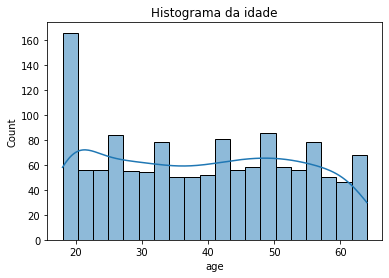

In [4]:
#Criando um histograma de distribuição de idade
sns.histplot(df['age'], bins=20, kde=True).set_title("Histograma da idade");

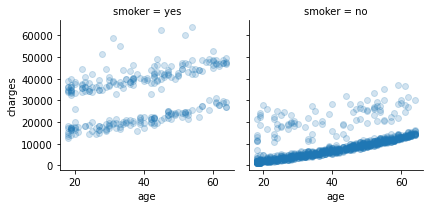

In [5]:
#PLotando o gráfico com relação entre idade e cobrança para fumantes e não fumantes
sns.FacetGrid(df, col="smoker").map(plt.scatter, "age", "charges", alpha=0.2).add_legend();

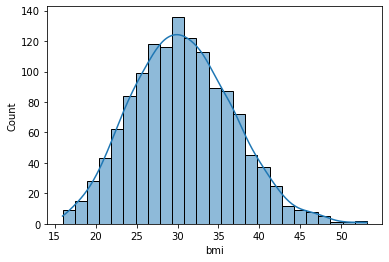

In [6]:
#Histograma de distribução de bmi
sns.histplot(df['bmi'], kde=True);

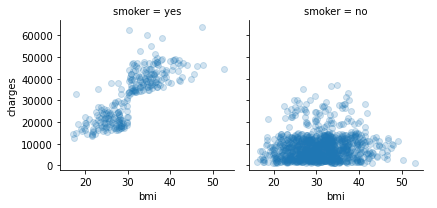

In [7]:
#Plotando o gráfico entre bmi x cobrança
sns.FacetGrid(df, col="smoker").map(plt.scatter, "bmi", "charges", alpha=0.2).add_legend();

Taking a first look at the data provided and some plotted graphs, we can see that there are probably relationships between the variables provided and the charge amount. Next we will investigate it.

## Linear Regression

We will initially focus on regression models where the amount charged is the dependent variable. That is, we will predict the amount charged based on other variables.
 
Since the feature charge is a quantitative variable, we will model it using linear regression.
 
### Interpreting regression parameters in a basic model
 
We will start with a simple linear regression model with only one covariable, age, predicting the charge. The model that is adjusted in the next block expresses the amount charged as a linear function of age

In [8]:
#Normalizando os dados 
df['smoker'] = df.smoker.replace({'no':0, 'yes':1})
df['region'] = df.region.replace({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})
df['sex'] = df.sex.replace({'female':0, 'male':1})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [9]:
modelo = sm.OLS.from_formula("charges ~ age", data=df)
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           4.89e-29
Time:                        14:26:26   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The part that starts to be relevant to us of the data presented is from __coef__. This section contains the estimated values for the parameters of the regression model. Its pattern, errors and other values are used to quantify the uncertainty in the estimates of the regression parameters.
 
This adjusted model implies that when comparing two people of different ages in one year, the oldest person will have an average of 257, 72 units of charges larger than the youngest person.
This difference is statistically significant, based on the p-value showing in the column labeled __'P> | t |'__. This means that there is strong evidence that there is a real association between age and charges made by the customer.
 
To better understand the meaning of the regression parameter 257.7226, we can look at the standard deviation of charges.


In [10]:
np.round(df.charges.std(), 0)

12110.0

The standard deviation of around $ 12110 is large compared to the slope of the 258 regression. However, the slope of the regression corresponds to the average change in collection for a single year of age, and this effect accumulates with age. Comparing a 40 year old person with a 60 year old person, there is a 20 year difference, which translates into '20 * 258 = 5160 'unit difference in the average value charged between these two people. This difference is about less than half a standard deviation, and is generally considered to be an important and significant change.
 
### R-square
 
In the case of regression with a single independent variable, as we have here, there is a very close correspondence between the regression analysis and Pearson's correlation analysis.
The R-square is a statistical measure of how close the data is to the adjusted regression line. The value obtained was 0.09, which means that 9% of the variation in the amount charged is explained by the age of the customers.
 
### Adding more variables to the model
 
After analyzing a simple linear regression model with only one covariant (age), we will use all the variables. The real power of regression happens when we have more than one covariant to predict an output.


In [11]:
modelo = sm.OLS.from_formula('charges ~ age + sex + bmi + children + smoker + region', data=df)
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:26:33   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.323e+04   1076.023    -12.295      0.000   -1.53e+04   -1.11e+04
age          257.2881     11.886     21.647      0.000     233.971     280.605
sex         -131.1106    332.811     -0.394      0.694    -784.001     521.780
bmi          332.5701     27.722     11.997      0.000     278.186     386.954
children     479.3694    137.644      3.483      0.001     209.346     749.393
smoker      2.382e+04    411.843     57.839      0.000     2.3e+04    2.46e+04
region       353.6400    151.927      2.328      0.020      55.598     651.682
==============================================================================
Omnibus:                      299.003   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.975
Skew:                           1.207   Prob(JB):                    9.17e-156
Kurtosis:                       5.642   Cond. No.                         335.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model that was adjusted above uses all parameters to explain the variation in the amount charged.
We can see how interesting the value of R-square is. If we look at the table, we will see a value of 0.75, that is, we have a linear regression model that 75% of the variation in the amount charged is probably explained by the variables provided.
 
Looking at the age coefficient, which we studied earlier, there were no changes even adding many other variables. Thus, we can notice that the age variable has no relation with the other variables provided in the model.
It is possible to confirm this result by looking at the value of the corrections between the variables and noting that there is almost no relationship between age and the rest of the other variables.


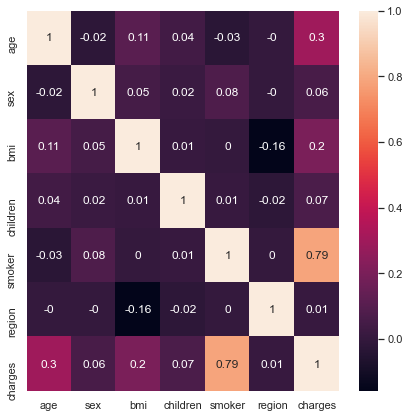

In [12]:
#correlação entre as variáveis
correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(7,7)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

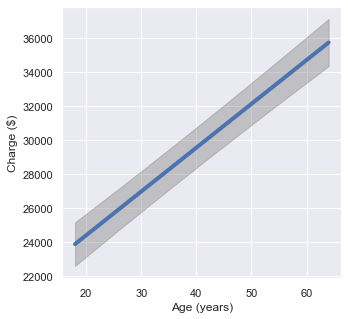

In [13]:
from statsmodels.sandbox.predict_functional import predict_functional

# Foi fixados algumas variáveis.
valores = {"sex": 0, "children": 0, "bmi": 25,
          "region": 1, "smoker": 1}

# Os valores retornados são os valores previstos (pr), as bandas de confiança (cb) e os valores da função (fv).
pr, cb, fv = predict_functional(resultado, "age",
                values=valores, ci_method="simultaneous")
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.lineplot(x=fv, y=pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age (years)")
_ = ax.set_ylabel("Charge ($)")

The plot analyzed for the number of children is shown below. Age is 50 with the other parameters the same.

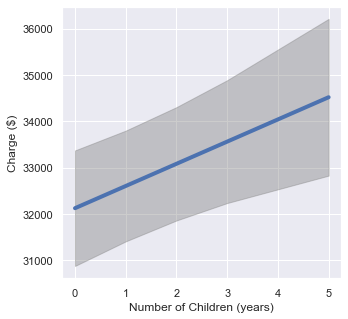

In [14]:

valores = {"sex": 0, "bmi": 25, "age": 50,
          "region": 1, "smoker": 1}

pr, cb, fv = predict_functional(resultado, "children",
                values=valores, ci_method="simultaneous")

ax = sns.lineplot(x=fv, y=pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Number of Children (years)")
_ = ax.set_ylabel("Charge ($)")

The error band for the number of children is noticeably greater than the error band for the age, indicating that there is less certainty in relation to children and charge compared to age and charge.
 
Now let's plot the residual plot on the adjusted model:

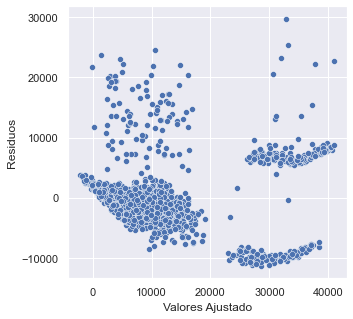

In [15]:
pp = sns.scatterplot(x=resultado.fittedvalues, y=resultado.resid)
pp.set_xlabel("Valores Ajustado")
_ = pp.set_ylabel("Residuos")

We see that the graphs of the residuals vs adjusted values do not show a constant variance, which, even with an R-square of 75%, is not so good for a multiple regression model.

# Conclusion

As can be seen, the linear regression model is a very powerful tool for analyzing model predictions if more than one variable is used. Using the python statsmodels library, we saw how easy and very useful it is to analyze statistical models.